### Introduction

Credit cards offer convenience by eliminating the need to carry large amounts of cash and allow for purchases to be paid over time. According to Statista, global transactions increased from 195 billion to 468 billion annually between 2014 and 2020.

Identifying fraudulent transactions is crucial for credit card companies to prevent customers from being charged for unauthorized purchases. To address this, I developed a machine learning classification model to train computers to detect patterns distinguishing genuine transactions from fraudulent ones.

### Understanding the Data 

The dataset used for this project was the Credit Card Fraud Detection dataset, available on Kaggle, and it contains credit card transactions that were made during the month of September, 2013 by European clients during two days. It has 284,807 transactions and 30 variables.

### Importing libraries 

In [55]:
# import the necessary packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import seaborn as sns 
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from matplotlib import gridspec 
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc , roc_auc_score

### Loading Data 

In [2]:
data = pd.read_csv("creditcard_fraud_data.csv") 

In [3]:

# Print the shape of the data 
# data = data.sample(frac = 0.1, random_state = 48) 
print(data.shape) 
print(data.describe()) 

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

In [4]:
# Determine number of fraud cases in dataset 
fraud = data[data['Class'] == 1] 
valid = data[data['Class'] == 0] 
outlierFraction = len(fraud)/float(len(valid)) 
print(outlierFraction) 
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0]))) 

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


Only 0.17% fraudulent transaction out all the transactions. The data is highly Unbalanced. Lets first apply our models without balancing it and if we don’t get a good accuracy then we can find a way to balance this dataset. But first, let’s implement the model without it and will balance the data only if needed.

In [5]:
#Print the amount details for Fraudulent Transaction
print('Amount details of the fraudulent transaction') 
fraud.Amount.describe() 

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [6]:
#Print the amount details for Normal Transaction
print('details of valid transaction') 
valid.Amount.describe() 

details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

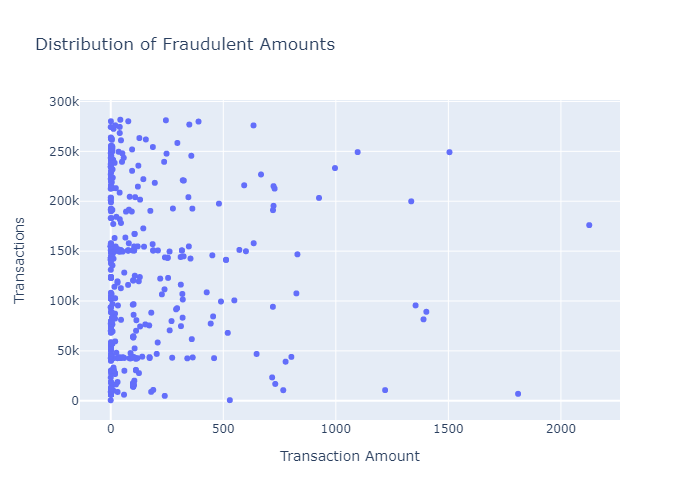

In [7]:
# Distribution of fraudulent transactions amount
fig = px.scatter(data.query("Class==1"), x = 'Amount', y =data.query("Class==1").index,
                title = 'Distribution of Fraudulent Amounts')
fig.update_layout(xaxis_title='Transaction Amount',
                  yaxis_title='Transactions')
fig.show('png')

Plotting the Correlation Matrix
The correlation matrix graphically gives us an idea of how features correlate with each other and can help us predict what are the features that are most relevant for the prediction.

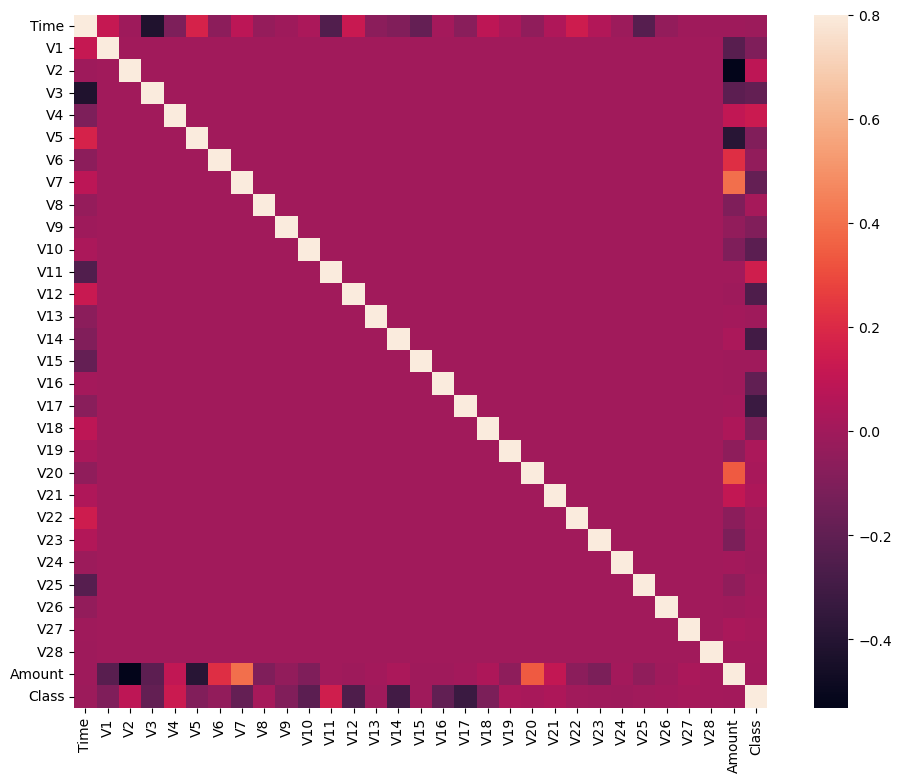

In [8]:
# Correlation matrix 
corrmat = data.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show() 

In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example, V2 and V5 are highly negatively correlated with the feature called Amount. We also see some correlation with V20 and Amount. 

In [9]:
# dividing the X and the Y from the dataset 
X = data.drop(['Class'], axis = 1) 
Y = data["Class"] 
print(X.shape) 
print(Y.shape) 



(284807, 30)
(284807,)


### Training and Testing Data`

In [10]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size= .3 , random_state= 111)

print('X Train size: ', train_x.shape)
print('X Test size: ', test_x.shape)
print('X Test proportion ', "%s%%"%round((len(test_x) / (len(train_x) + len(test_x))) * 100))
print('Y Train size: ', train_y.shape)
print('Y Test size: ', test_y.shape)
print('Y Test proportion ', "%s%%"%round((len(test_y) / (len(train_y) + len(test_y))) * 100))

X Train size:  (199364, 30)
X Test size:  (85443, 30)
X Test proportion  30%
Y Train size:  (199364,)
Y Test size:  (85443,)
Y Test proportion  30%


In [11]:
# Scaling data on the training set
scaler = StandardScaler()
train_x['Amount'] = scaler.fit_transform(train_x.Amount.values.reshape(-1,1))
train_x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
64454,51150.0,-3.538816,3.481893,-1.827130,-0.573050,2.644106,-0.340988,2.102135,-2.939006,2.578654,...,1.345904,0.530978,-0.860677,-0.201810,-1.719747,0.729143,-0.547993,-0.023636,-0.454966,-0.364820
37906,39163.0,-0.363913,0.853399,1.648195,1.118934,0.100882,0.423852,0.472790,-0.972440,0.033833,...,-0.192932,0.687055,-0.094586,0.121531,0.146830,-0.944092,-0.558564,-0.186814,-0.257103,-0.291617
79378,57994.0,1.193021,-0.136714,0.622612,0.780864,-0.823511,-0.706444,-0.206073,-0.016918,0.781531,...,-0.178761,-0.310405,-0.842028,0.085477,0.366005,0.254443,0.290002,-0.036764,0.015039,-0.269644
245686,152859.0,1.604032,-0.808208,-1.594982,0.200475,0.502985,0.832370,-0.034071,0.234040,0.550616,...,-0.040448,0.519029,1.429217,-0.139322,-1.293663,0.037785,0.061206,0.005387,-0.057296,0.286095
60943,49575.0,-2.669614,-2.734385,0.662450,-0.059077,3.346850,-2.549682,-1.430571,-0.118450,0.469383,...,-0.430295,-0.228329,-0.370643,-0.211544,-0.300837,-1.174590,0.573818,0.388023,0.161782,-0.128344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105747,69669.0,1.222065,-0.557475,0.231881,-0.054993,-0.516954,0.277267,-0.428552,0.064469,-1.007380,...,-0.423128,-0.432976,-0.627235,-0.038963,-0.270258,0.423935,0.395472,0.005571,0.003752,-0.188823
102486,68226.0,-0.378726,0.176414,2.038723,1.075694,-0.216415,0.921706,0.055936,0.337719,0.397505,...,0.027322,0.207481,0.801599,-0.158665,-0.340407,-0.327219,-0.132057,0.020642,-0.085085,-0.163920
135892,81448.0,-2.201029,2.135296,-0.082015,-0.079166,-0.824369,-0.347833,-0.465664,1.384499,0.152787,...,0.104650,-0.222762,-0.569381,-0.039511,-0.459539,0.307848,0.316537,0.269799,0.147944,-0.330374
10196,15772.0,-1.998332,-0.137916,2.196376,1.961751,-0.344791,0.764497,0.196137,0.123434,2.914590,...,-0.258861,-0.854563,-0.761780,0.709752,-0.053680,0.139729,-0.383565,0.534322,0.071052,-0.004875


In [12]:
# Scaling data on the testing set
scaler = StandardScaler()
test_x['Amount'] = scaler.fit_transform(test_x.Amount.values.reshape(-1,1))
test_x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
254469,156745.0,-1.189404,-0.591269,-0.600846,3.512289,-1.390089,1.752359,2.374289,0.450939,-1.003577,...,0.969503,0.745457,1.095133,1.461693,0.589701,-0.209193,0.097121,-0.223566,0.092385,2.073851
121929,76371.0,1.253168,-0.536514,0.010453,-2.002376,-0.675496,-0.765532,-0.155118,-0.136187,1.882972,...,0.002578,0.016080,0.425180,-0.274055,0.104499,0.954705,-0.672143,0.074562,0.009715,-0.232562
114879,73658.0,-1.644384,0.233326,1.593087,-0.030053,1.026072,-1.067972,0.373123,-1.477697,0.415043,...,-0.240111,0.391676,-0.420744,-0.276312,0.542789,-0.633719,-0.028573,-0.127075,-0.290045,-0.265498
81232,58839.0,-0.636997,0.645736,0.269894,-0.538135,1.507577,4.108075,-0.988026,1.529162,0.059633,...,0.014794,0.039418,-0.003335,-0.023020,1.042331,-0.522377,0.315403,-0.079888,0.098038,-0.307288
273250,165506.0,-8.082612,7.069211,-4.137467,-3.087794,-0.356587,-1.988519,1.663142,-0.366969,6.218938,...,4.263887,-0.901314,0.532696,0.128477,0.005124,1.255585,-0.000528,2.071641,0.565471,-0.309437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145898,87260.0,-0.914450,2.361973,0.335526,4.114377,0.557196,0.874183,0.332492,0.540016,-2.070688,...,0.352808,-0.159933,-0.261357,0.186308,0.718244,-0.911284,-0.093219,-0.282263,-0.229368,-0.321679
259781,159269.0,2.204616,-1.738143,0.199040,-1.169062,-2.154919,-0.240743,-1.826352,0.055305,-0.167696,...,-0.462528,-0.351733,-0.277338,0.367239,0.017619,-0.484231,-0.301598,0.073366,-0.033047,-0.265170
114318,73432.0,1.167353,-0.980628,-0.070241,-1.031467,-0.336948,0.705070,-0.668792,0.087606,-1.020943,...,0.447678,0.436068,1.001649,-0.421000,-1.249586,0.648797,0.052853,0.012959,0.015032,0.177502
284692,172688.0,2.001831,0.570453,-2.364605,1.455708,1.169517,-0.855711,0.792066,-0.412883,-0.086356,...,-0.091051,-0.018417,0.181531,-0.039637,0.519640,0.537885,-0.521880,0.004388,-0.016896,-0.224801


 we proceed to deal with the imbalance of our data. I used imblearn library to apply SMOTE in order to oversample the fraudulent data, which means that I increased the total number of fraudulent transactions by synthetically generating more of them based on the frauds that we already have in the dataset.

In [13]:
Y.value_counts() # 0 = Genuine Transactions | 1 = Fraud

Class
0    284315
1       492
Name: count, dtype: int64

In [14]:
from imblearn.over_sampling import SMOTE
train_x, train_y = SMOTE().fit_resample(train_x,train_y) # Reshaping data

In [15]:
train_y.value_counts()

Class
0    199025
1    199025
Name: count, dtype: int64

### Building a logistic Regression 



In [39]:
# Building the Logistic Regression 
from sklearn.linear_model import LogisticRegression
# Applying logistic regression Classifier 
logistic_reg = LogisticRegression(max_iter=1000,random_state = 111)
logistic_reg.fit(train_x,train_y)
 
yPred_lr = logistic_reg.predict(test_x)

### Building a Random Forest Model using scikit learn

In [18]:
# Building the Random Forest Classifier (RANDOM FOREST) 
from sklearn.ensemble import RandomForestClassifier 
# random forest model creation 
rfc = RandomForestClassifier(n_estimators = 100, random_state = 111) 
rfc.fit(train_x, train_y) 
# predictions 
yPred_rfc = rfc.predict(test_x) 

### Building Decision Trees using scikit learn

In [19]:
# Building the Decision Trees 
from sklearn.tree import DecisionTreeClassifier
# Applying Decision Tree Classifier 
decision_tree = DecisionTreeClassifier(random_state = 111)
decision_tree.fit(train_x, train_y) 
# predictions 
yPred_dt = decision_tree.predict(test_x) 

### Building Gradient Boosting Machine-GBM using scikit learn

In [20]:
# Building the GBM Classifer 
from sklearn.ensemble import GradientBoostingClassifier
# Applying Gradient Boosting Classifier 
gradient_boosting = GradientBoostingClassifier(n_estimators = 100, random_state = 123)
gradient_boosting.fit(train_x,train_y)
 
y_pred_gb = gradient_boosting.predict(test_x)

### Evaluation Metrics for Classification Models

When dealing with classification models, there are some evaluation metrics that we can use in order to see the efficiency of our models.

In [40]:
# Evaluating the Logistic Regression 
  
n_outliers = len(fraud) 
n_errors = (yPred_lr != test_y).sum() 
print("The model used is Logistic Regression") 
  
acc = accuracy_score(test_y, yPred_lr) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(test_y, yPred_lr) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(test_y, yPred_lr) 
print("The recall is {}".format(rec)) 

auc = roc_auc_score(test_y, yPred_lr)
print("The AUC is {}".format(auc))
  
f1 = f1_score(test_y, yPred_lr) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(test_y, yPred_lr) 
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Logistic Regression
The accuracy is 0.9832753999742518
The precision is 0.09154929577464789
The recall is 0.934640522875817
The AUC is 0.9590015839845141
The F1-Score is 0.16676384839650146
The Matthews correlation coefficient is0.28971210263541003


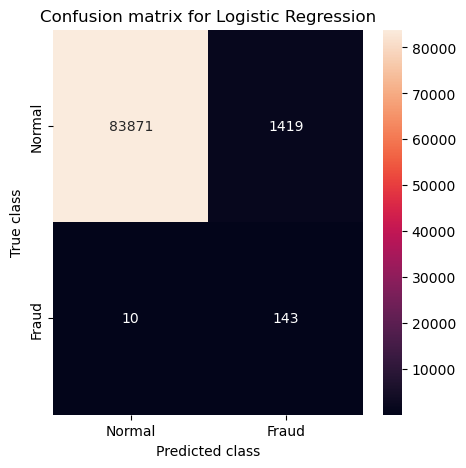

In [41]:
# printing the confusion matrix for Logistic Regression 
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(test_y, yPred_lr) 
plt.figure(figsize =(5, 5)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix for Logistic Regression") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

In [31]:
# Evaluating the classifier Random Forest classifier
  
n_outliers = len(fraud) 
n_errors = (yPred_rfc != test_y).sum() 
print("The model used is Random Forest classifier") 
  
acc = accuracy_score(test_y, yPred_rfc) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(test_y, yPred_rfc) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(test_y, yPred_rfc) 
print("The recall is {}".format(rec)) 

auc = roc_auc_score(test_y, yPred_rfc)
print("The AUC is {}".format(auc))
  
f1 = f1_score(test_y, yPred_rfc) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(test_y, yPred_rfc) 
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9994733330992591
The precision is 0.8461538461538461
The recall is 0.8627450980392157
The AUC is 0.9312318525721931
The F1-Score is 0.854368932038835
The Matthews correlation coefficient is0.854145549097181


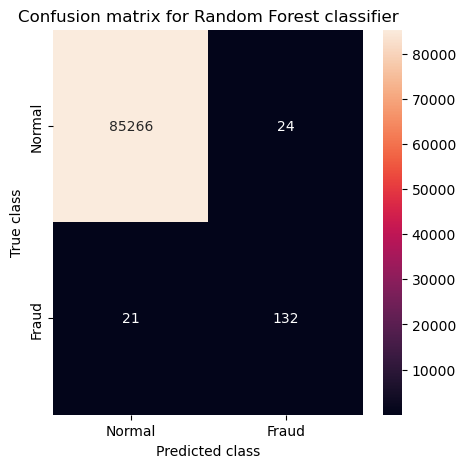

In [36]:
# printing the confusion matrix 
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(test_y, yPred_rfc) 
plt.figure(figsize =(5, 5)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix for Random Forest classifier") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

In [42]:
# Evaluating the classifier Decision Trees
  
n_outliers = len(fraud) 
n_errors = (yPred_dt != test_y).sum() 
print("The model used is Decision Trees") 
  
acc = accuracy_score(test_y, yPred_dt) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(test_y, yPred_dt) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(test_y, yPred_dt) 
print("The recall is {}".format(rec)) 

auc = roc_auc_score(test_y, yPred_dt)
print("The AUC is {}".format(auc))
  
f1 = f1_score(test_y, yPred_dt) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(test_y, yPred_dt) 
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Decision Trees
The accuracy is 0.9976943693456456
The precision is 0.42517006802721086
The recall is 0.8169934640522876
The AUC is 0.9075059945422652
The F1-Score is 0.5592841163310962
The Matthews correlation coefficient is0.588430707986104


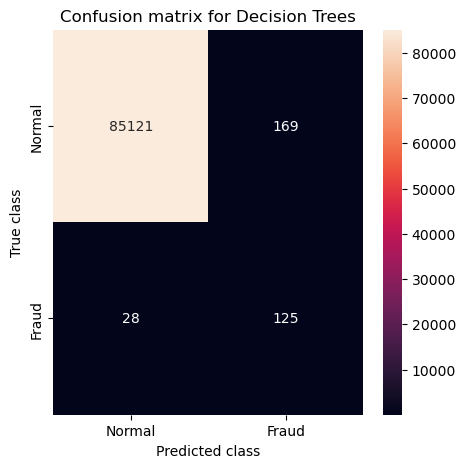

In [43]:
# printing the confusion matrix 
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(test_y, yPred_dt) 
plt.figure(figsize =(5, 5)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix for Decision Trees") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

In [46]:
# Evaluating the classifier GBM
  
n_outliers = len(fraud) 
n_errors = (y_pred_gb != test_y).sum() 
print("The model used is Gradient Boosting Machines") 
  
acc = accuracy_score(test_y, y_pred_gb) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(test_y, y_pred_gb) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(test_y, y_pred_gb) 
print("The recall is {}".format(rec)) 

auc = roc_auc_score(test_y, y_pred_gb)
print("The AUC is {}".format(auc))
  
f1 = f1_score(test_y, y_pred_gb) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(test_y, y_pred_gb) 
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Gradient Boosting Machines
The accuracy is 0.9938672565335955
The precision is 0.21505376344086022
The recall is 0.9150326797385621
The AUC is 0.9545206780097429
The F1-Score is 0.3482587064676617
The Matthews correlation coefficient is0.4419880019096952


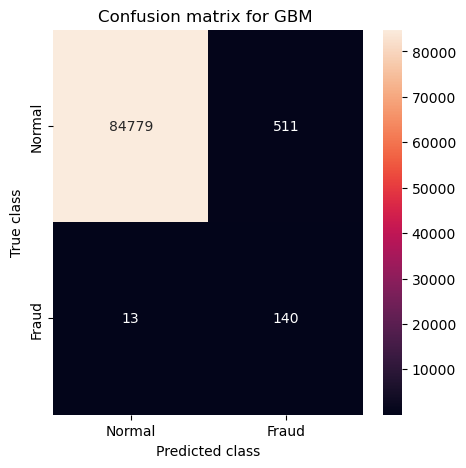

In [47]:
# printing the confusion matrix 
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(test_y, y_pred_gb) 
plt.figure(figsize =(5, 5)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix for GBM ") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

### Conclusion 

<i>In this project, our goal is to detect fraudulent transactions when they occur, and the model that best performed was the Logistic Regression with a recall of 93%, correctly detecting 143 fraudulent transactions out of 153. <br> However, it is also important to note that the Logistic Regression had the biggest number of false positives, that is, 1,419 genuine transactions were mistakenly labeled as fraud, that’s 1.66% of all genuine transactions.</i>